# Priority Queues
your name: Vivek Koodli Udupa

Note: While printing the tree, nodes names are in the from value_index. This form is chosen so that 2 nodes with same values are not ignored. 

In [3]:
# Note that tuples have an ordering so we can put key/value 
# pairs into priority queue:
a=(1,"abc")
b=(4,"hello")
print ("a=",a," b=",b)
print (a<b, a>b, a==b)

a= (1, 'abc')  b= (4, 'hello')
True False False


In [4]:
# The most common tool for working with graphs is networkx. See
#     https://networkx.github.io/documentation/stable/ or
#     https://networkx.github.io/documentation/networkx-1.10/
# (depending on your version)11
# Networkx uses matplotlib to draw pictures of graphs. The various networks drawing methods 
# give a lot of fine control over the appearance of graphs.

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import math
import numpy as np

G = nx.Graph()
# Not actualy necessary to add nodes explicitly. They will be added if they appear in edges.
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')

G.add_edge('1', '2') 
G.add_edge('2', '3') 
G.add_edge('3', '4') 
G.add_edge('4', '1') 
G.add_edge('4', '5')
G.add_edge('5', '6')
nx.draw_networkx(G)
plt.savefig("undirected.png")
plt.show()

# Nodes can be any objects (e.g. integers)
# We can rename nodes as well
cities = {'1': "New York", '2': "London", '3': "Berlin", '4': "Paris", '5': "Milan", '6':"London"}
H = nx.relabel_nodes(G, cities)
nx.draw_networkx(H)
plt.savefig("undir-renamed.png")
plt.show()

G = nx.DiGraph()
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')

G.add_edge('1', '2') 
G.add_edge('2', '3') 
G.add_edge('3', '4') 
G.add_edge('4', '1') 
G.add_edge('4', '5') 

# nx.write_dot(G,'test.dot')
# plt.title('draw_networkx')
# pos=nx.graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=False, arrows=False)

pos = nx.random_layout(G,dim=2)
nx.draw_networkx(G)
plt.savefig("directed.png")
plt.show()

nx.is_tree(G)

False

In [5]:
class PriorityQueue():
    '''
    The arguments passed to a PriorityQueue must consist of
    objects than can be compared using <.
    Use a tuple (priority, item) if necessary.
    '''

    def __init__(self):
        self._array = []
        self._arrayPrint = []

    def push(self, obj):
        # append at end and bubble up
        self._array.append( obj )
        n = len(self._array)
        self._bubble_up(n-1)
        
    def pop(self):
        n = len(self._array)
        if n==0:
            return None
        if n==1:
            return self._array.pop()
        
        # replace with last item and sift down:
        obj = self._array[0]
        self._array[0] = self._array.pop()
        self._sift_down(0)
        return obj
    
    def _parent(self, n):
        return (n-1)//2

    def _left_child(self, n):
        return 2*n + 1

    def _right_child(self, n):
        return 2*n + 2

    def _bubble_up(self, index):
        while index>0:
            cur_item = self._array[index]
            parent_idx = self._parent(index)
            parent_item = self._array[parent_idx]
            
            if cur_item < parent_item:
                # swap with parent
                self._array[parent_idx] = cur_item
                self._array[index] = parent_item
                index = parent_idx
            else:
                break
    
    def _sift_down(self,index):
        n = len(self._array)
        
        while index<n:           
            cur_item = self._array[index]
            lc = self._left_child(index)
            if n <= lc:
                break

            # first set small child to left child:
            small_child_item = self._array[lc]
            small_child_idx = lc
            
            # right exists and is smaller?
            rc = self._right_child(index)
            if rc < n:
                r_item = self._array[rc]
                if r_item < small_child_item:
                    # right child is smaller than left child:
                    small_child_item = r_item
                    small_child_idx = rc
            
            # done: we are smaller than both children:
            if cur_item <= small_child_item:
                break
            
            # swap with smallest child:
            self._array[index] = small_child_item
            self._array[small_child_idx] = cur_item
            
            # continue with smallest child:
            index = small_child_idx
        
    def size(self):
        return len(self._array)
    
    def is_empty(self):
        return len(self._array) == 0
    
    def show(self,scle = 1):
        # TODO
        G = nx.DiGraph()
        n = len(self._array)
        
        #push items one index ahed so that the array starts from array[1] and not from array[0]
        self._array.insert(0,0)
        self._arrayPrint = []
        for i in range(n + 1):
            self._arrayPrint.append( str(self._array[i]) + "_" + str(i) )
#         print("array is: ", self._array)
#         print("Print array is: ", self._arrayPrint)
#         print("array that will be printed: \n",self._arrayPrint );
        #Now for array[i] children are array[i*2] and array[i*2 + 1]. Parent is array[i//2]
        mid = scle*(n//2)
        #Add nodes
        #Height of the tree
        h = math.floor( math.log(n,2) )
        hs = scle*h #scaled height
        #Adding root node
        G.add_node(self._arrayPrint[1],pos = (mid,hs))
        hs = hs - 1;
        #Add all other nodes
        #n+1 because we inserted a 0 in the begining 
        L = 2; #root node already taken care of. Start with next layer
        j = 0
        for i in range(2,n+1):
            if(i > ((2**L) - 1)):
                hs = hs - 1;
                L = L + 1;
                j = 0;
                space = []
            #Max nodes per layer
            Lnodes = 2**(L-1)
            #Max nodes in previous layer
            LnodesPrev = 2**(L-2)
            #Starting and eng points for the position
            start = ((mid) - scle*(Lnodes//2))
            end = ((mid) + scle*(Lnodes//2)) 
            space = np.linspace(start, end, Lnodes)
            G.add_node(self._arrayPrint[i],pos=(space[j], hs))
            j = j + 1
            
        #Add edges
        for i in range(1,n+1):
            if(i*2 > n):
                break;
            G.add_edge(self._arrayPrint[i],self._arrayPrint[i*2]) #Left child
            if(i*2 + 1 > n):
                break;
            G.add_edge(self._arrayPrint[i],self._arrayPrint[i*2 + 1]) #Right child
        #Draw , Save and show plot
        pos=nx.get_node_attributes(G,'pos')
#         pos=nx.rescale_layout(pos,scale=4)
        plt.figure(3,figsize=(24,24))
        nx.draw_networkx(G,pos,node_size = 1000)
        plt.savefig("pq_show.png")
        plt.show()
        return
    
    def addNode(self,G):
        """Returns the node position"""
        #n includes the extra 0 added at the begining.
        n = len(self._array)
        
        
    
    def heapify(self, items):
        """ Take an array of unsorted items and replace the contents
        of this priority queue by them. """
        self._array = items
        s = self.size()
        n = s // 2
        
        for i in range(n-1, -1, -1):
            self.heapifyMin(i)
        

    def heapifyMin(self, i):
        
        s = self.size()
        n = s // 2
        l = self._left_child(i)
        r = self._right_child(i)
        smallest = i
        
        #Compare smallest child with parent
        if (l < s and r < s):
            if(self._array[l] < self._array[r]):
                smallest = l
            else:
                smallest = r
        elif (l < s):
            smallest = l
        
        elif(r < s):
            smallest = r
    
        if(self._array[i] > self._array[smallest]):
            #swap smallest element with current element
            temp = self._array[i]
            self._array[i] = self._array[smallest]
            self._array[smallest] = temp
            
            #Recursively check for order
            self.heapifyMin(smallest)
    
    def decrease_priority(self, old, new):
        # replace old by new and we can assume that new will compare smaller
        # (so priority is higher or the value is smaller)
        assert(new <= old)
        
        i = 0
        for j in self._array:
            if(j == old):
                self._array[i] = new
                break
            i = i + 1
       
        #Shift all elements left and remove the first zero
        sz = self.size()
        for k in range(1,sz):
            self._array[k-1] = self._array[k]
        #Remove the final element
        self._array.pop()
        
        p = self._parent(i-1)
    
        #check for heap order by traversing up until root
        while (p != 0):
            self.heapifyMin(p)
            p = self._parent(p)
        
        #Remove the first zero 
#         print("first elemnt = ",self._array[0], "Last element is: ", self._array[-1])
        
        #self._array[0] = []
        #shift elements to the left

                


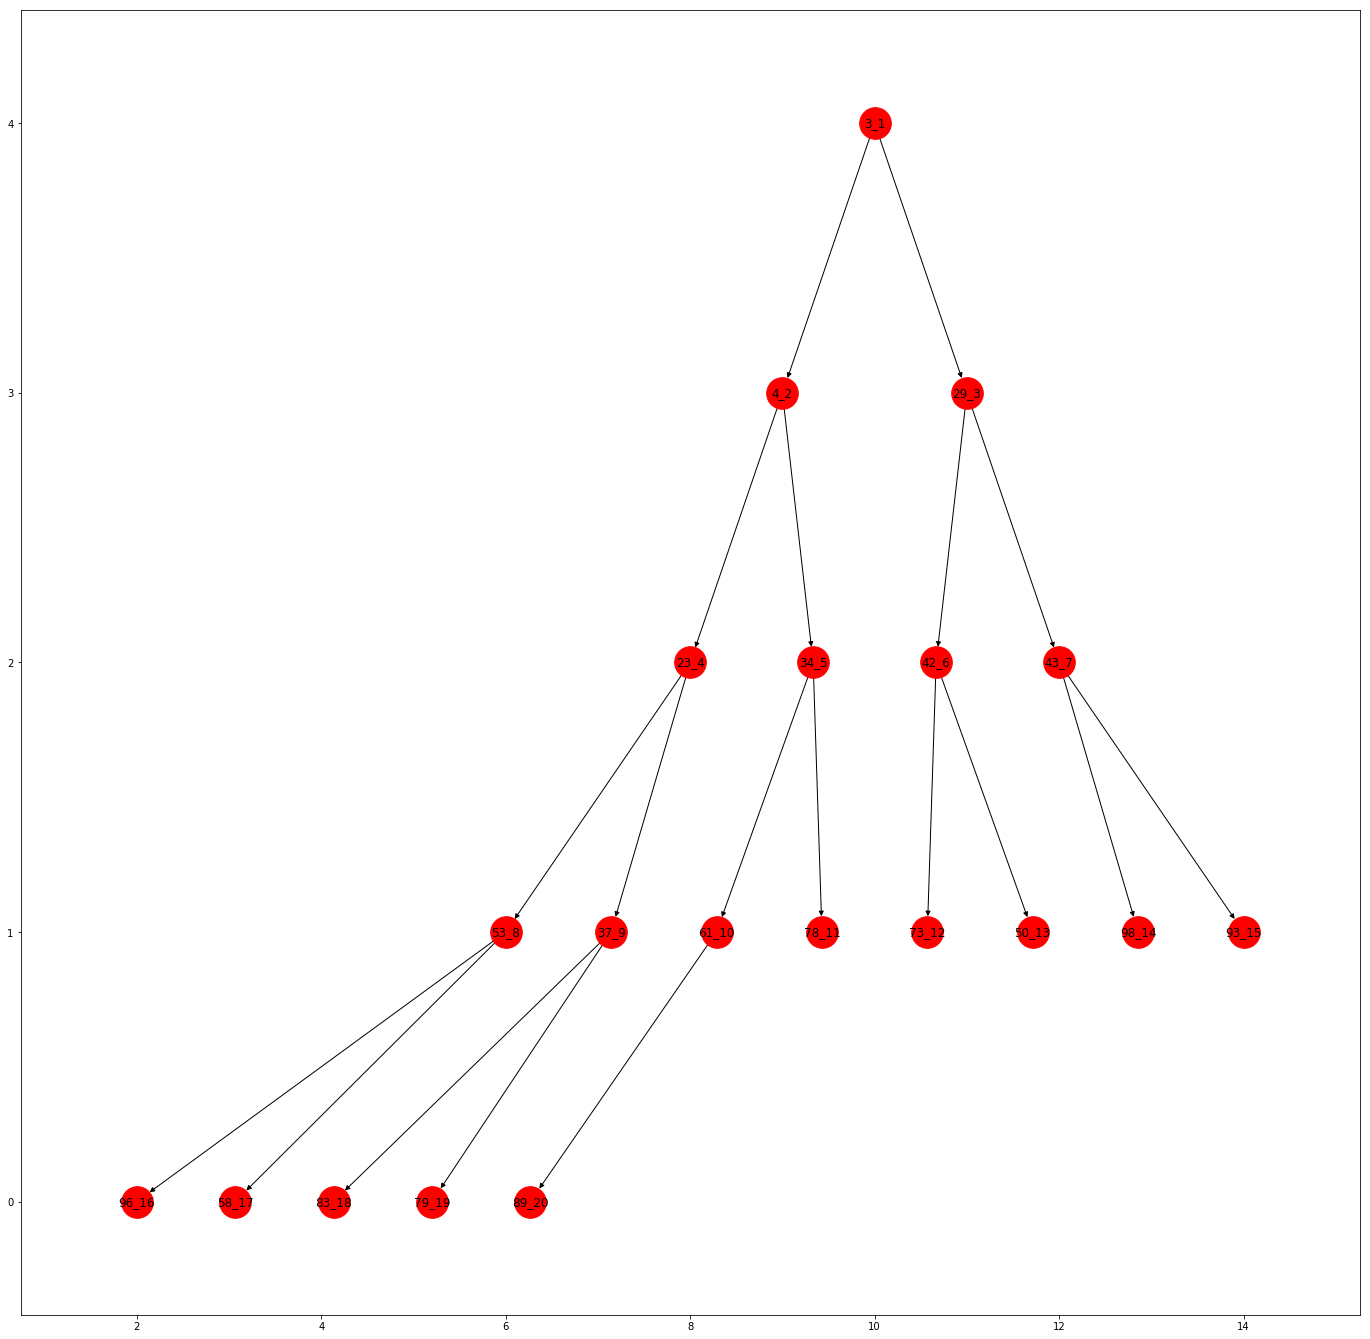

empty =  False , size =  21
array:  [0, 3, 4, 29, 23, 34, 42, 43, 53, 37, 61, 78, 73, 50, 98, 93, 96, 58, 83, 79, 89]

in order:
0 3 4 23 29 34 37 42 43 50 53 58 61 73 78 79 83 89 93 96 98 
empty =  True , size =  0
array:  []


In [6]:
# small demo where we fill and empty a priority queue with random numbers
import random
pq = PriorityQueue()
for i in range(20):
    pq.push(random.randint(0,100))
    
pq.show()
print ("empty = ", pq.is_empty(), ", size = ",pq.size())
print ("array: ", pq._array)

print ("\nin order:")
while not pq.is_empty():
    print (pq.pop(),end=" ")
    
print ()
print ("empty = ", pq.is_empty(), ", size = ",pq.size())
print ("array: ", pq._array)


## Question 1
Implement PriorityQueue.show() that shows a graphical representation of the tree (either using matplotlib and networkx or by formatting text and print layer by layer, indented reasonably well):

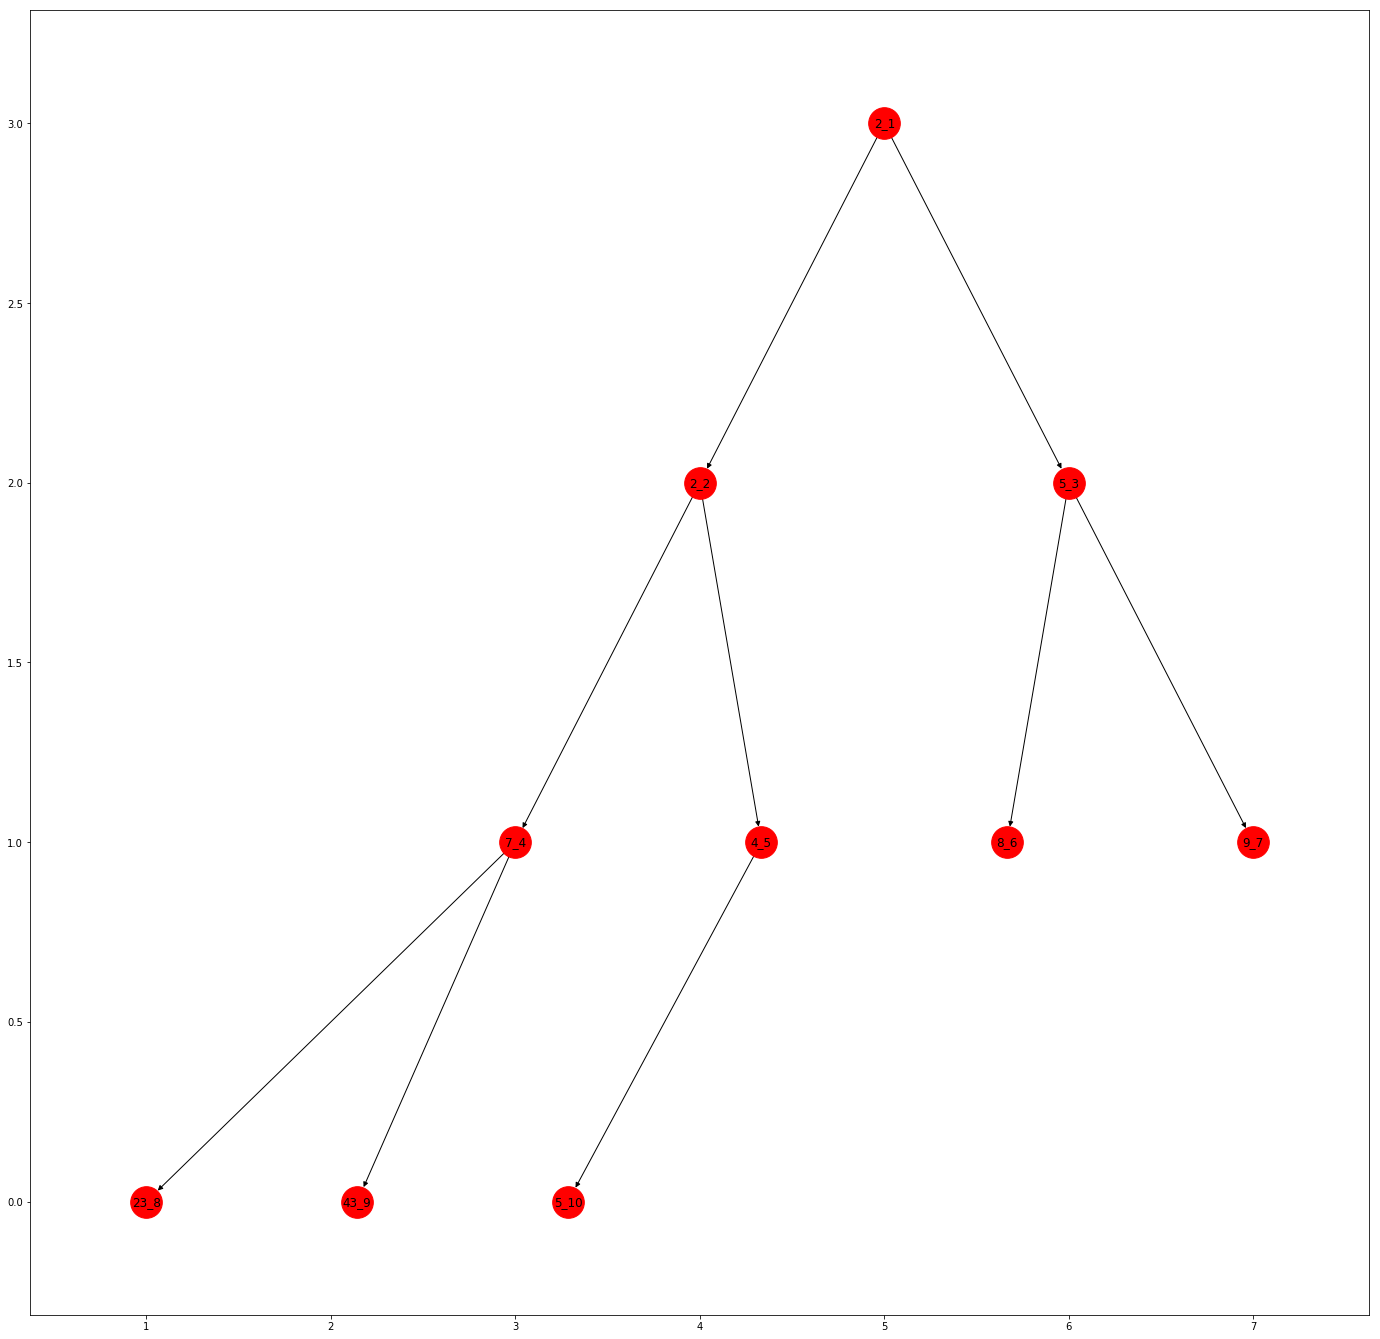

In [7]:
pq = PriorityQueue()
for i in [5,7,2,5,4,8,9,23,43,2]:
    pq.push(i)

pq.show()
# nx.is_tree(pq._array)

## Question 2
You are given the following dictionary of people and their age. Use a priority queue (and no other data structure/array/...) to output their names sorted by age (once with increasing age, then with decreasing age). Print age and name for each person in a single line.

In [8]:
names = {"Noah":4, "Jacob":7, "Mia":10, "Ava":5, "Madison":1, "Charlotte":13}

pq = PriorityQueue()

#Increasing order
print("Increasing order \n")
for name in names:
     pq.push((names[name],name))
#       print((names[name],name))

# for value,key in names.items():
for i in range(len(names)):
    (name, key) = pq.pop()
    print(name, key)

print()
print("Decreasing order \n")
#Decreasing Order
for name in names:
    pq.push( (-names[name],name) )

for i in range(len(names)):
    (name,key) = pq.pop()
    print(-name, key)
# ???


Increasing order 

1 Madison
4 Noah
5 Ava
7 Jacob
10 Mia
13 Charlotte

Decreasing order 

13 Charlotte
10 Mia
7 Jacob
5 Ava
4 Noah
1 Madison


## Question 3
Implement heapify() and test that it works using the following code.

unsorted: [54, 86, 5, 35, 13, 33, 73, 13, 83, 1, 47, 41, 32, 84, 80, 0, 76, 61, 90, 81]
in PQ: [0, 1, 5, 13, 13, 32, 73, 35, 61, 54, 47, 41, 33, 84, 80, 86, 76, 83, 90, 81]


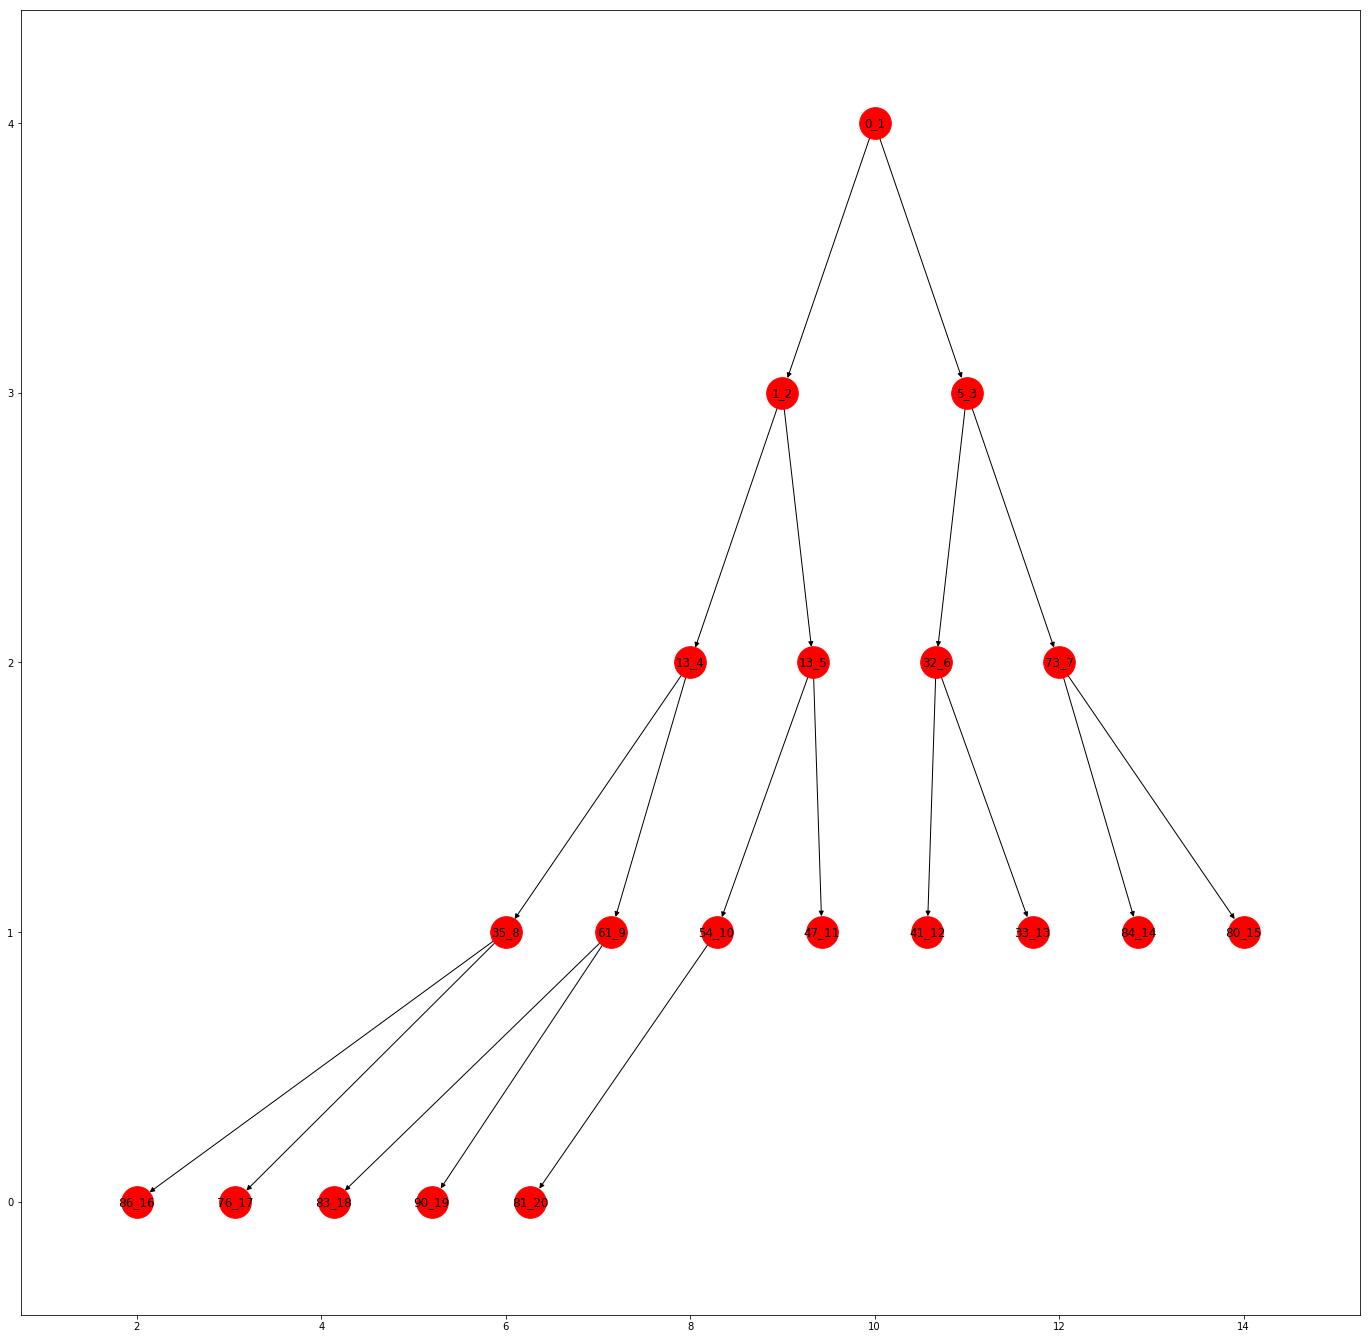

in order:
0 0 1 5 13 13 32 33 35 41 47 54 61 73 76 80 81 83 84 86 90 

In [9]:
import random
items = []
for i in range(20):
    items.append(random.randint(0,100))
# items = [90, 25, 14, 5, 27, 63, 75, 1, 23, 2, 57, 87, 55, 78, 3, 21]

print ("unsorted:", items)
pq = PriorityQueue()
pq.heapify(items)
print ("in PQ:", pq._array)
pq.show()

print ("in order:")
while not pq.is_empty():
    print (pq.pop(), end=" ")

## Question 4
implement decrease_priority() to decrease the priority of an item in the priority queue. Sadly, you have to search for the item before you can change it making the operation more expensive (please fill in below). This can be avoided, but we are not going to discuss this here.

array:  [1, 5, 3, 21, 27, 55, 14, 25, 23, 43, 57, 87, 63, 78, 75, 90]


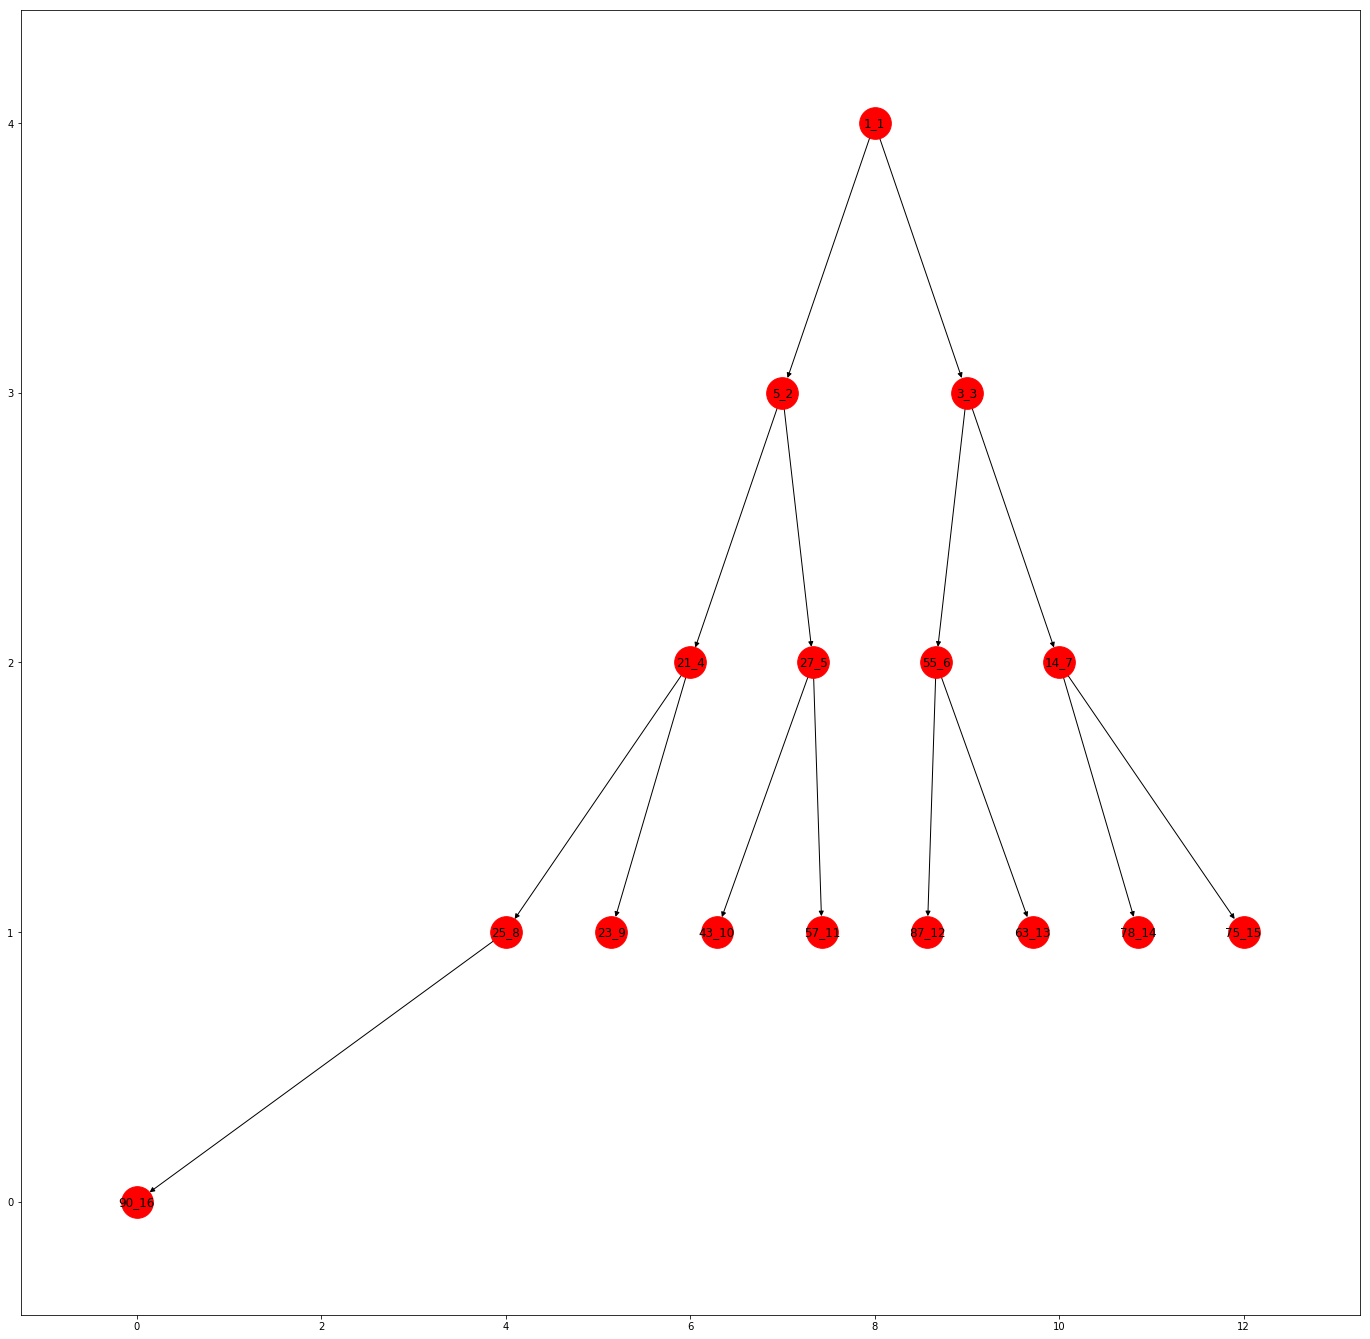

after:
array:  [1, 2, 3, 21, 5, 55, 14, 25, 23, 27, 57, 87, 63, 78, 75, 90]


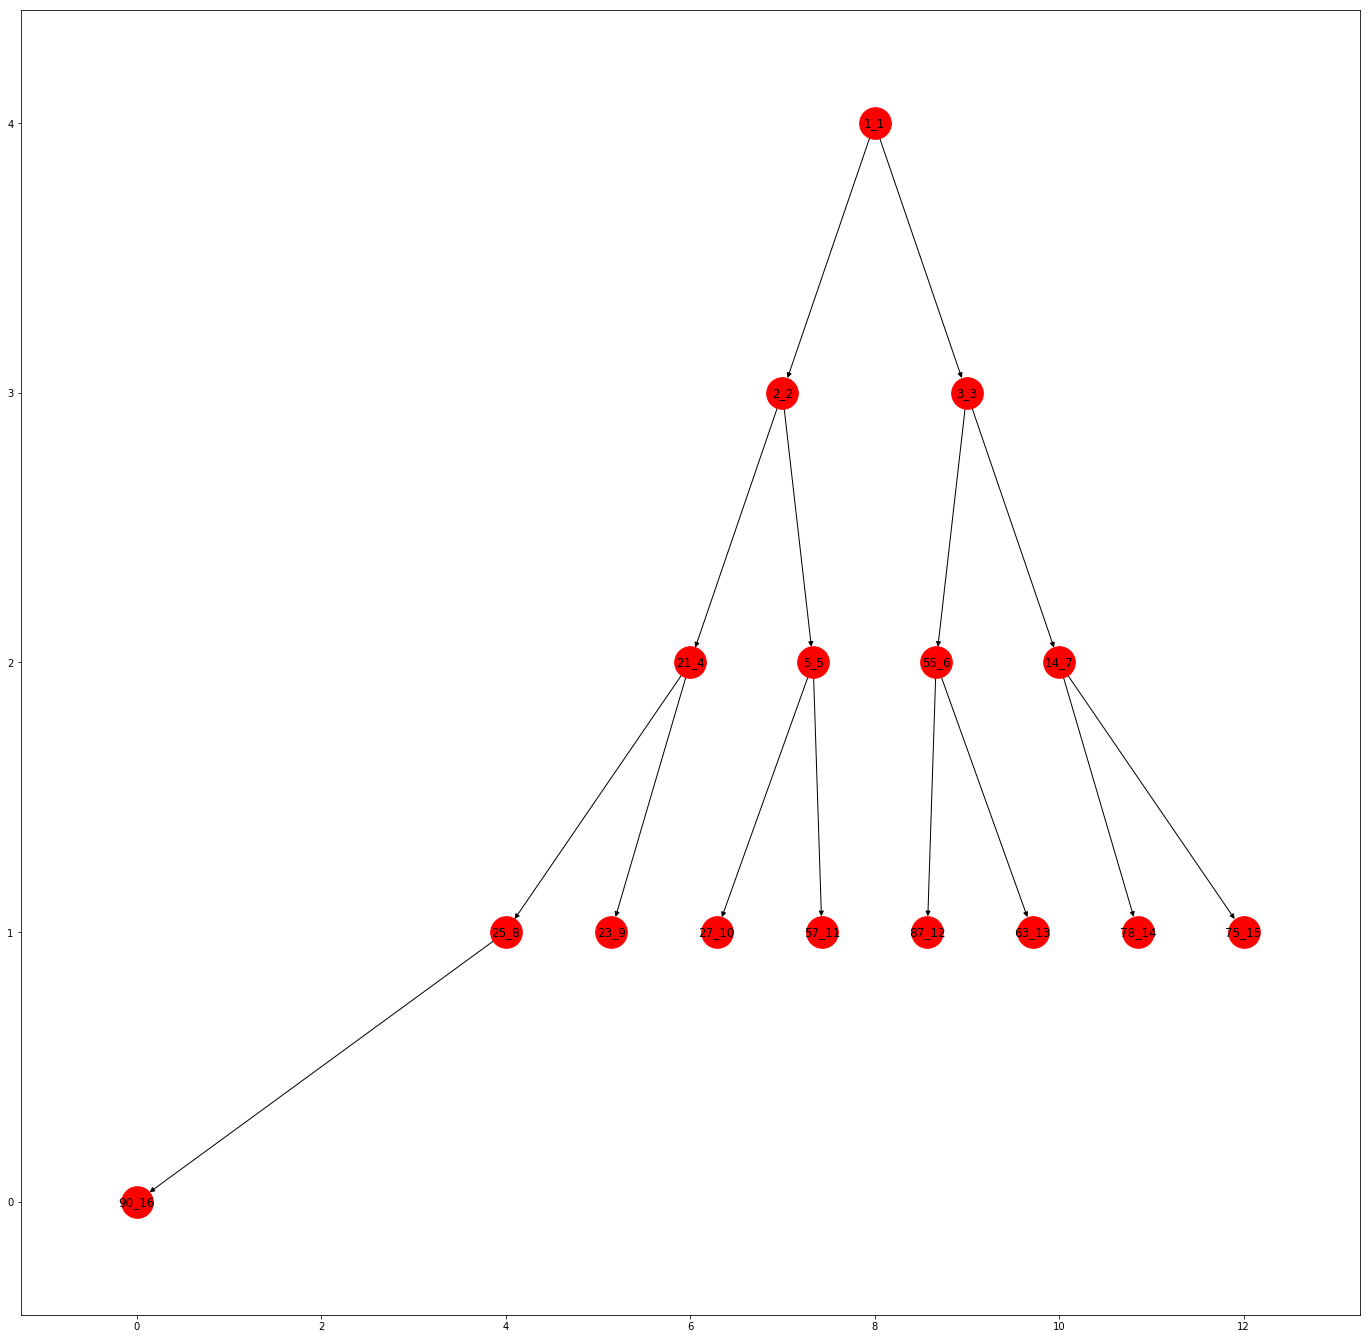

In [10]:
# the cost of decrease_priority() is O(n + logn) = o(n) because we have 
# to search for the item first

items = [90, 25, 14, 5, 27, 63, 75, 1, 23, 43, 57, 87, 55, 78, 3, 21]
pq = PriorityQueue()
pq.heapify(items)

print ("array: ", pq._array)
pq.show()

pq.decrease_priority(43, 2)
print ("after:")
print ("array: ",pq._array)
pq.show()


## Question 5
Now similar to the name/age example before: 1) create a priority queue (this time using heapify, note that you need to create an array first) and show it, 2) change Jacob's age to 3 (using decrease_priority), 3) show the tree again

[(4, 'Noah'), (7, 'Jacob'), (10, 'Mia'), (5, 'Ava'), (1, 'Madison'), (13, 'Charlotte'), (17, 'Emma'), (8, 'Olivia'), (10, 'Abigail'), (5, 'Micheal'), (43, 'Alexander'), (13, 'Daniel')]


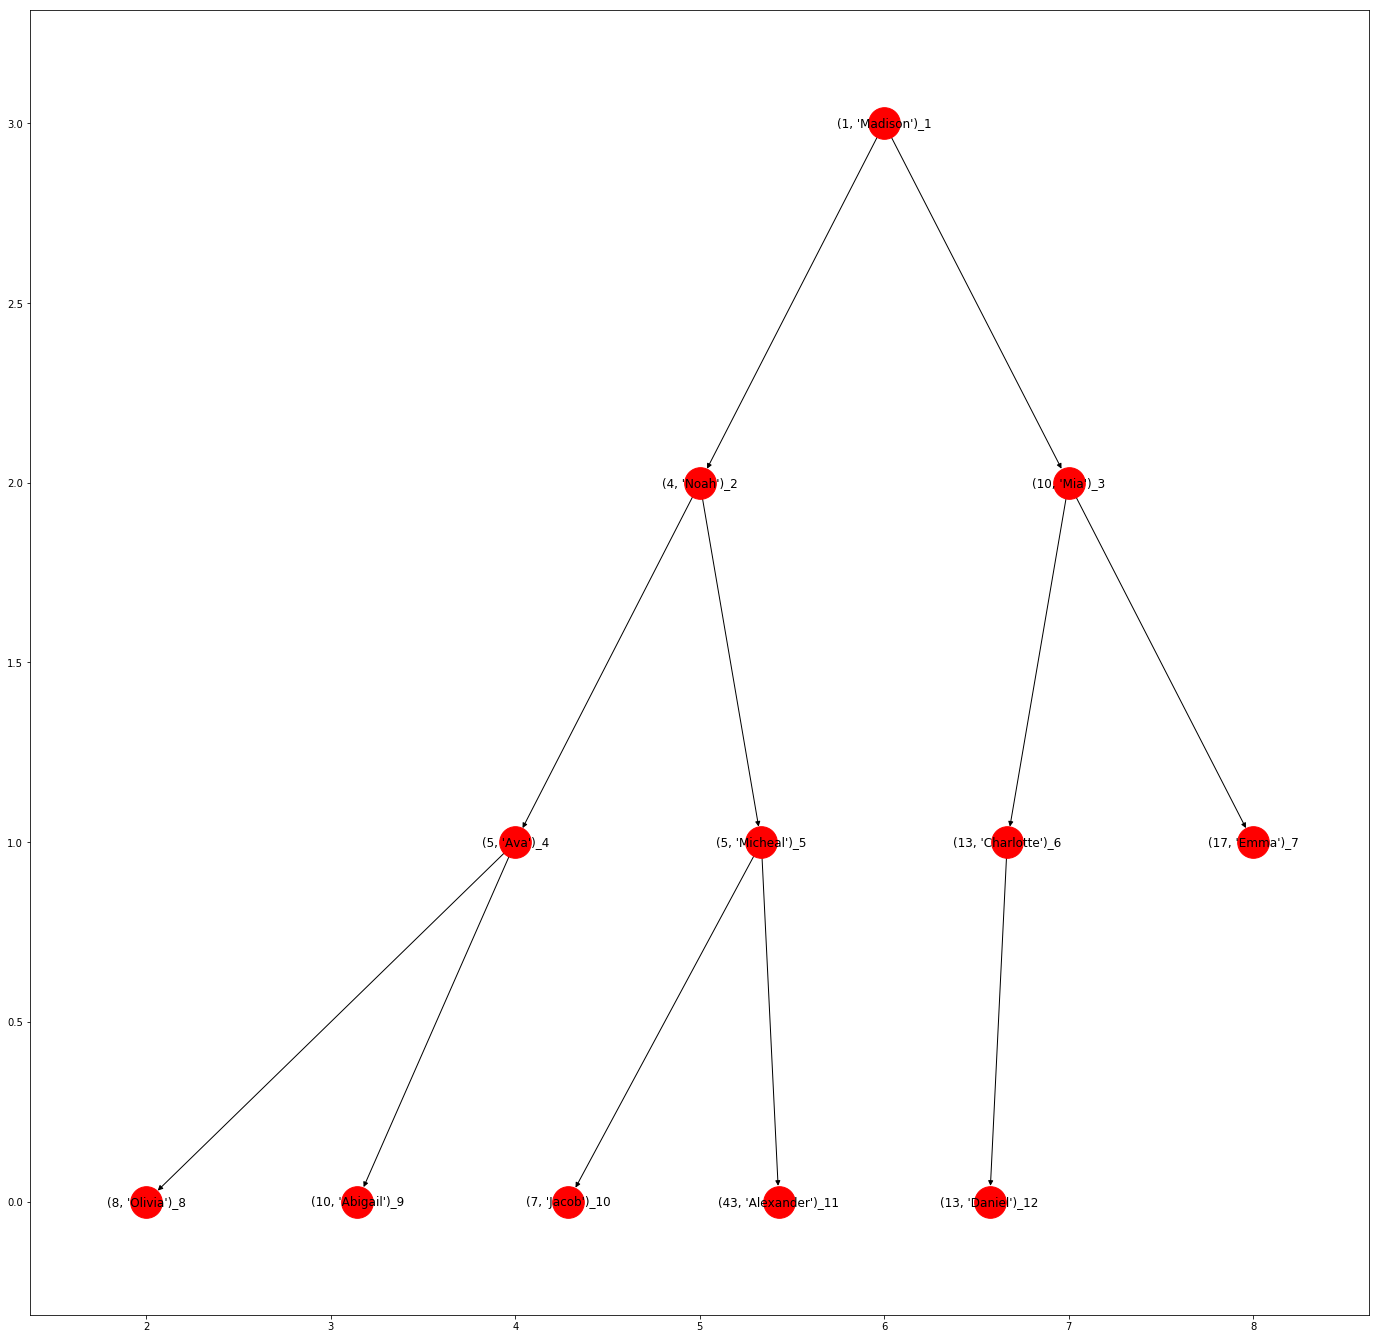

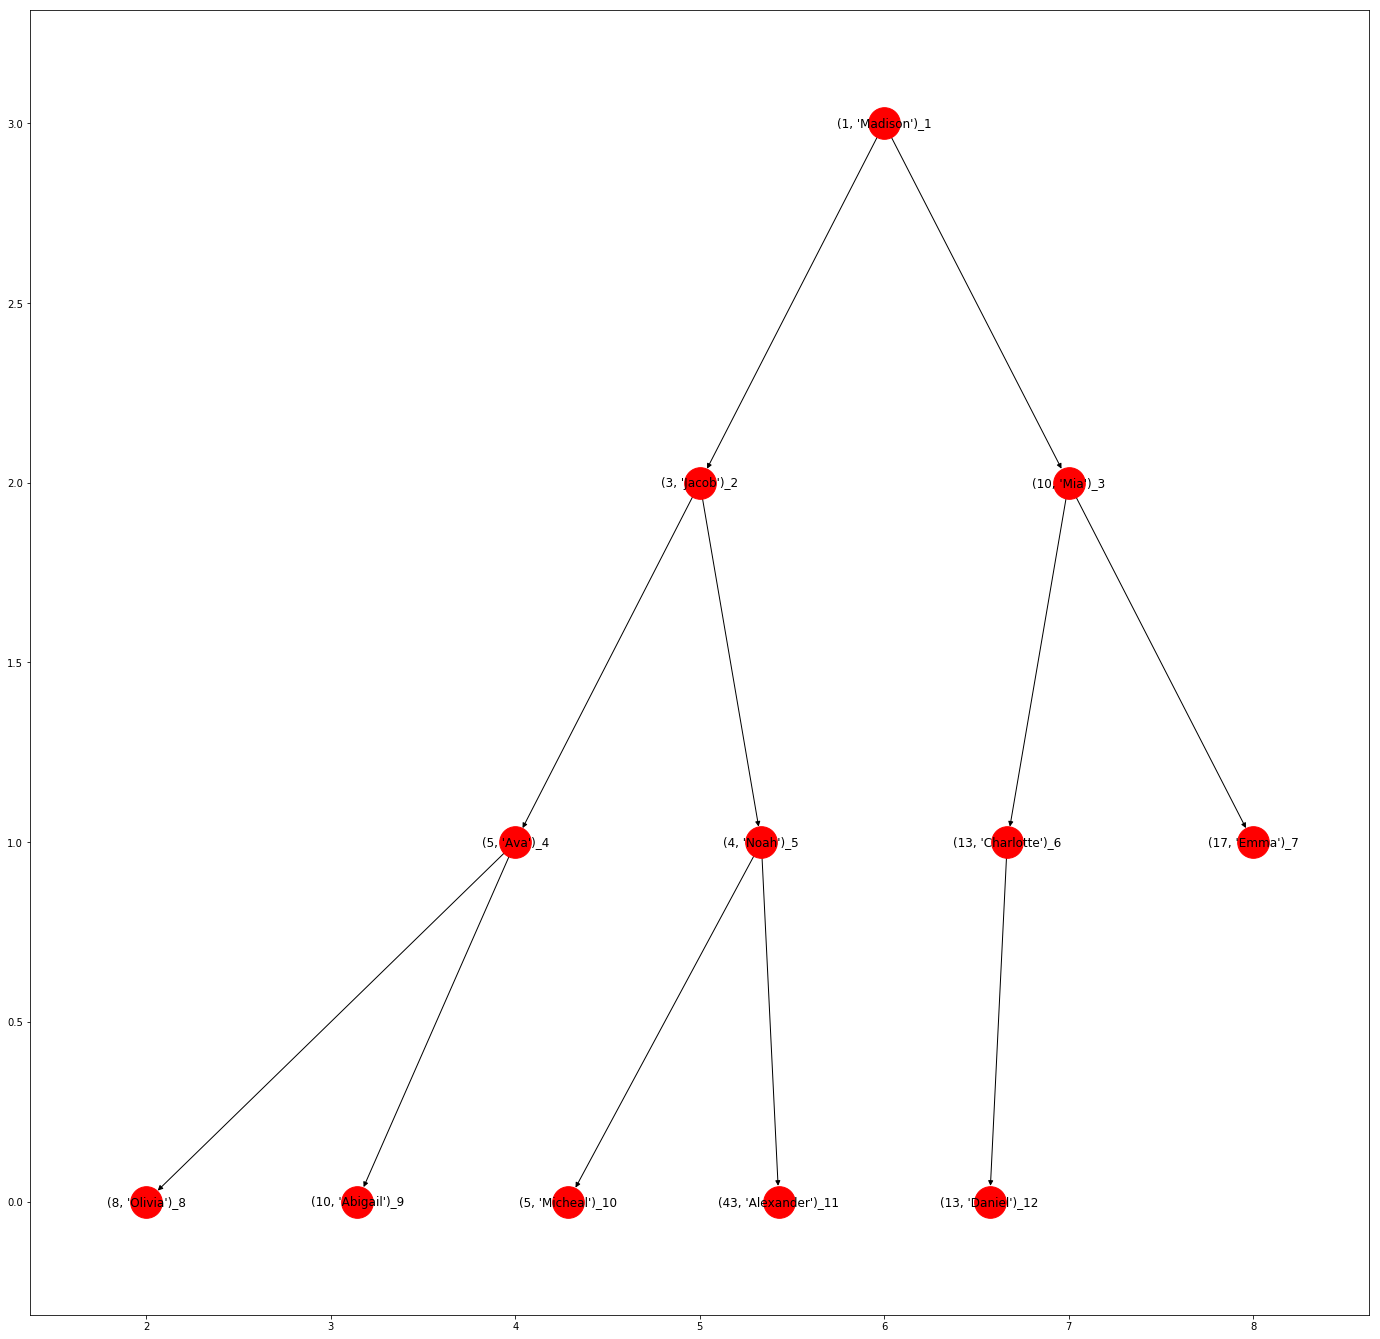

In [11]:
names = {"Noah":4, "Jacob":7, "Mia":10, "Ava":5, "Madison":1, "Charlotte":13, "Emma": 17, \
         "Olivia": 8, "Abigail": 10, "Micheal": 5, "Alexander": 43, "Daniel": 13}
pq = PriorityQueue()

name = []
for i in names:
    name.append((names[i],i))

print(name)

pq.heapify(name)
pq.show()

pq.decrease_priority((7,"Jacob"),(3,"Jacob"))

pq.show()


